# Here we get an estimate on the spacial variation of the field, as calculated by its moments

## Get the field data

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/field_info/'
sys.path.append(path)
from field_grid import *
from format_field import get_field_df

In [3]:
#Point to the data and get the df
path='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/field_info/data/'
file = "60Hr_Average_Comparison_all_3956_3997_norescut.txt"
# file = "60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg.txt"
file = path + file
df_field = get_field_df(file)

## Get the time-averaged field moments

In [4]:
#Get the multipole and errors
b = [df_field["D"].mean(), df_field["NQ"].mean(),
        df_field["SQ"].mean(), df_field["NS"].mean()]
eb = [df_field["eD"].mean(), df_field["eNQ"].mean(),
        df_field["eSQ"].mean(), df_field["NS"].mean()]

## Get the field grid, get its RMS, and plot it

rms = 919 ppb


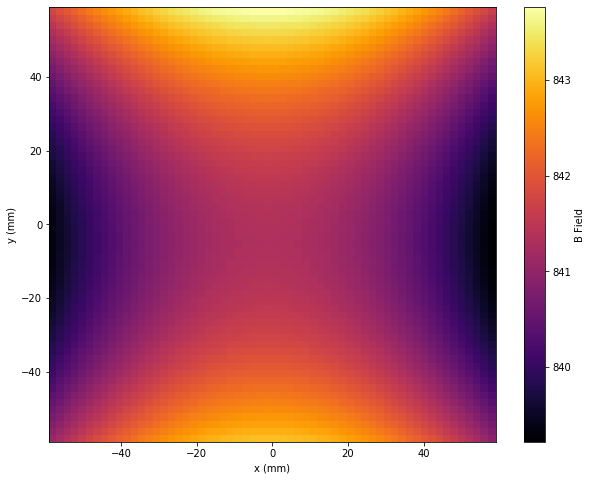

In [5]:
df_field_grid = get_field_grid(b)
fig = plot_field(df_field_grid)
print("rms = " +str(int(1000*df_field_grid['B'].std()))+" ppb")
fig

## Define the region within the beamline (radius = 4.5 cm)

In [6]:
mask = ( np.power(df_field_grid['x'],2) + 
        np.power(df_field_grid['y'],2) <= 
        45**2 )
df_field_grid_chopped = df_field_grid[mask]
print("rms = " +str(int(1000*df_field_grid_chopped['B'].std()))+" ppb")

rms = 499 ppb


## Get the field's RMS for circles with various radii

In [7]:
def cut_circle(df,radius):
    mask = ( np.power(df['x'],2) + np.power(df['y'],2) <= radius**2 )
    rms = df[mask]['B'].std()
    return rms

In [8]:
radii = np.arange(45)
rms_arr = np.empty(0)
for r in radii:
    rms = cut_circle(df_field_grid,r)*1000.0 #convert from ppm to ppb
    rms_arr = np.append(rms_arr,rms)

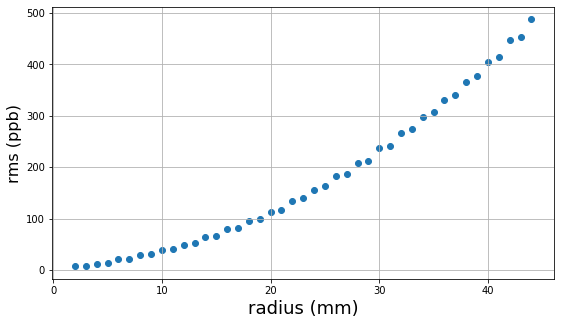

In [9]:
fig = plt.figure(figsize=(9,5))
plt.scatter(radii, rms_arr)
plt.grid()
plt.xlabel('radius (mm)', fontsize=18)
plt.ylabel('rms (ppb)', fontsize=16)
plt.show()

# Now do the same for thing but for early and late fields

In [10]:
#get the moments for an early and late time
b_early = [df_field.iloc[0]["D"], df_field.iloc[0]["NQ"],
        df_field.iloc[0]["SQ"], df_field.iloc[0]["NS"]]
b_late = [df_field.iloc[-1]["D"], df_field.iloc[-1]["NQ"],
        df_field.iloc[-1]["SQ"], df_field.iloc[-1]["NS"]]
#get the corresponding field grids
df_field_grid_early = get_field_grid(b_early)
df_field_grid_late = get_field_grid(b_late)

rms_early_arr = np.empty(0)
rms_late_arr = np.empty(0)
for r in radii:
    rms = cut_circle(df_field_grid_early,r)*1000.0
    rms_early_arr = np.append(rms_early_arr,rms)
    rms = cut_circle(df_field_grid_late,r)*1000.0
    rms_late_arr = np.append(rms_late_arr,rms)

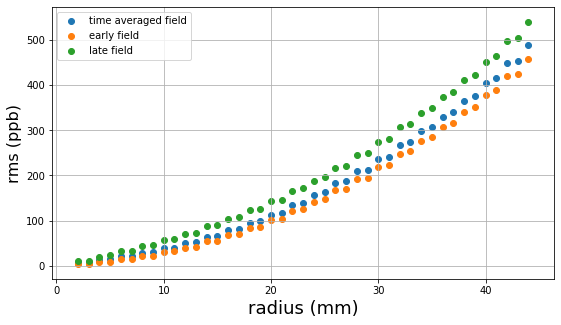

In [11]:
fig = plt.figure(figsize=(9,5))
plt.scatter(radii, rms_arr,label='time averaged field')
plt.scatter(radii, rms_early_arr,label='early field')
plt.scatter(radii, rms_late_arr,label='late field')
plt.grid()
plt.xlabel('radius (mm)', fontsize=18)
plt.ylabel('rms (ppb)', fontsize=16)
plt.legend()
plt.show()